# Project Proposal: Statistical Analysis of Van 311 Service Requests

**Aminu Yiwere**  
_IE6200 - Statistics and Probability_

## Introduction

The dataset selected for this project is the **Van 311 Service Requests dataset**, which contains 598,855 records of service requests made to Vancouver’s 311 system from 2022 to 2024. This dataset includes variables such as:

- The department handling the request
- Service request type
- Status
- Closure reason
- Submission channel
- Geographic information (latitude, longitude, and local area)
- Timestamps for when requests were opened and closed

This dataset provides a wealth of information for analyzing trends, measuring performance, and identifying disparities in response times and service quality across departments and neighborhoods. However, it also presents challenges such as missing values in fields like geographic information and local areas, which will require cleaning and preprocessing.

---

## Research Questions

This project aims to answer the following key research questions:

1. **What are the most common service request types, and how do they vary across departments?**
2. **What is the average response time for service requests, and does it differ significantly between:**
   - Departments (e.g., Engineering Management vs. Vancouver Police Department)?
   - Submission channels (e.g., Phone vs. WEB)?
3. **Are there seasonal or temporal patterns in service requests?**
4. **Do certain local areas have disproportionately higher complaint volumes or response times?**
5. **Is there a significant difference in response times among multiple service request types?** (ANOVA)

These questions will be addressed using confidence intervals, hypothesis testing, and ANOVA, with assumptions validated for statistical accuracy.

---

## Preliminary EDA Plan

The Exploratory Data Analysis (EDA) will focus on:

1. **Descriptive Statistics**:
   - Summarize service request types, statuses, and closure reasons.
   - Compute basic statistics (mean, median, standard deviation) for response times.
2. **Visualizations**:

   - Bar charts for the distribution of service request types and submission channels.
   - Boxplots to compare response times across departments and request types.
   - Time-series plots to examine seasonal patterns.

3. **Data Cleaning**:
   - Convert timestamps to datetime format and calculate response times (difference between ‘Service request close date’ and ‘Service request open timestamp’).
   - Handle missing values by filtering or imputing where necessary.

The results of the EDA will guide the selection of statistical tests to ensure robust analysis.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

# from statsmodels.stats.weightstats import ztest


In [3]:
# Read service request file
data = pd.read_csv('/Users/ay/Desktop/StatsProject/data/3-1-1-service-requests.csv', delimiter=';')
data.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom
0,ENG - Parking Management,Residential Parking Permit Request Case,Close,Unknown,2022-09-16T20:21:59-07:00,2023-10-19,2023-10-19T09:31:57-07:00,NaN,Sunset,Phone,NaN,NaN,NaN
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16T20:31:00-07:00,2022-09-21,2022-09-21T09:05:01-07:00,14 W 14TH AV,Mount Pleasant,Phone,49.258205,-123.105516,"49.25820514218, -123.10551579402"
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16T20:36:00-07:00,2022-09-22,2022-09-22T12:07:23-07:00,3180 KINGS AV,Renfrew-Collingwood,Phone,49.241261,-123.037927,"49.24126129747, -123.03792693417"
3,ENG - Parking Enforcement and Operations,Parking Enforcement Transfer Case,Close,Unknown,2022-09-16T20:37:36-07:00,2022-09-16,2022-09-16T20:37:36-07:00,NaN,NaN,Phone,NaN,NaN,NaN
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16T20:58:00-07:00,2022-09-20,2022-09-20T10:20:52-07:00,NaN,NaN,WEB,NaN,NaN,NaN


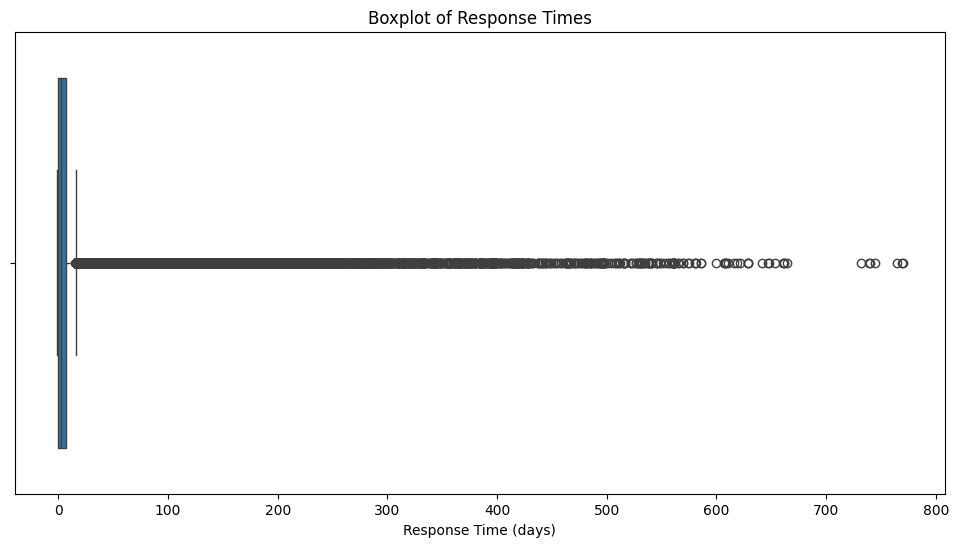

In [9]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['response_time'])
plt.title('Boxplot of Response Times')
plt.xlabel('Response Time (days)')
plt.show()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598855 entries, 0 to 598854
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Department                      598855 non-null  object 
 1   Service request type            598855 non-null  object 
 2   Status                          598855 non-null  object 
 3   Closure reason                  583944 non-null  object 
 4   Service request open timestamp  598855 non-null  object 
 5   Service request close date      583839 non-null  object 
 6   Last modified timestamp         598855 non-null  object 
 7   Address                         200897 non-null  object 
 8   Local area                      473373 non-null  object 
 9   Channel                         598855 non-null  object 
 10  Latitude                        201164 non-null  float64
 11  Longitude                       201164 non-null  float64
 12  geom            

In [7]:
df = data
df['Service request open timestamp'] = pd.to_datetime(df['Service request open timestamp'], errors='coerce')
df['Service request close date'] = pd.to_datetime(df['Service request close date'], errors='coerce')

# datetime conversion before using .dt accessor
df = df.dropna(subset=['Service request open timestamp', 'Service request close date'])

# Re-check the datetime conversion
df['open_timestamp'] = pd.to_datetime(df['Service request open timestamp']).dt.tz_localize(None)
df['close_date'] = pd.to_datetime(df['Service request close date']).dt.tz_localize(None)

# Calculate response time in days
df['response_time'] = (df['close_date'] - df['open_timestamp']).dt.total_seconds() / 86400

# Drop rows with missing response time
df_clean = df.dropna(subset=['response_time'])




/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_76150/457189649.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open_timestamp'] = pd.to_datetime(df['Service request open timestamp']).dt.tz_localize(None)
/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_76150/457189649.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_date'] = pd.to_datetime(df['Service request close date']).dt.tz_localize(None)
/var/folders/z5/2dlc2_2d15qb0wmtpf41r0j00000gn/T/ipykernel_76150/457189

In [212]:
df.describe()

,Service request close date,Latitude,Longitude,open_timestamp,close_date,response_time
count,404809,136823.000000,136823.000000,404809,404809,404809.000000
mean,2023-11-01 17:36:19.436721664,49.257703,-123.103744,2023-10-25 11:43:45.221410304,2023-11-01 17:36:19.436721664,7.244840
min,2022-08-17 00:00:00,49.199370,-123.281389,2022-08-17 00:01:32,2022-08-17 00:00:00,-0.999745
25%,2023-05-17 00:00:00,49.240864,-123.133523,2023-05-10 15:54:50,2023-05-17 00:00:00,0.089583
50%,2023-09-22 00:00:00,49.262209,-123.103248,2023-09-15 18:19:00,2023-09-22 00:00:00,2.388206
75%,2024-06-19 00:00:00,49.277318,-123.069601,2024-06-12 13:58:47,2024-06-19 00:00:00,6.645197
max,2024-11-03 00:00:00,49.314098,-123.023101,2024-11-02 20:33:46,2024-11-03 00:00:00,769.622118
std,NaN,0.022977,0.043035,NaN,NaN,23.401933


### The maximum value of the response time is 769.62 which suggest that there are outliers in the data.


In [224]:
# filter out response time with negative values.
df = df[df['response_time'] >= 0]
df.describe()
# df['response_time'].describe()

,Service request close date,Latitude,Longitude,open_timestamp,close_date,response_time
count,306781,119345.000000,119345.000000,306781,306781,306781.000000
mean,2023-10-30 10:39:22.793001728,49.256659,-123.103132,2023-10-20 17:09:12.697109504,2023-10-30 10:39:22.793001728,9.729284
min,2022-08-18 00:00:00,49.199370,-123.281389,2022-08-17 00:09:55,2022-08-18 00:00:00,0.000000
25%,2023-05-16 00:00:00,49.239618,-123.133549,2023-05-07 11:56:15,2023-05-16 00:00:00,1.503542
50%,2023-09-21 00:00:00,49.261114,-123.102248,2023-09-11 15:59:08,2023-09-21 00:00:00,4.270139
75%,2024-06-19 00:00:00,49.276183,-123.068704,2024-06-10 07:42:40,2024-06-19 00:00:00,8.975972
max,2024-11-03 00:00:00,49.314098,-123.023101,2024-11-02 15:05:56,2024-11-03 00:00:00,769.622118
std,NaN,0.022947,0.043507,NaN,NaN,26.403575


In [225]:
# I want to convert departments to distinct individual departments, ie (ENG - Parking Management becomes ENG)

df['department'] = df['Department'].apply(lambda x: x[:3])

In [226]:
df['department'].unique()

array(['ENG', 'PR ', 'DBL', '311', 'CMO', 'VPD', 'FSC', 'REF', 'VFR',
       'PDS', 'ACC'], dtype=object)

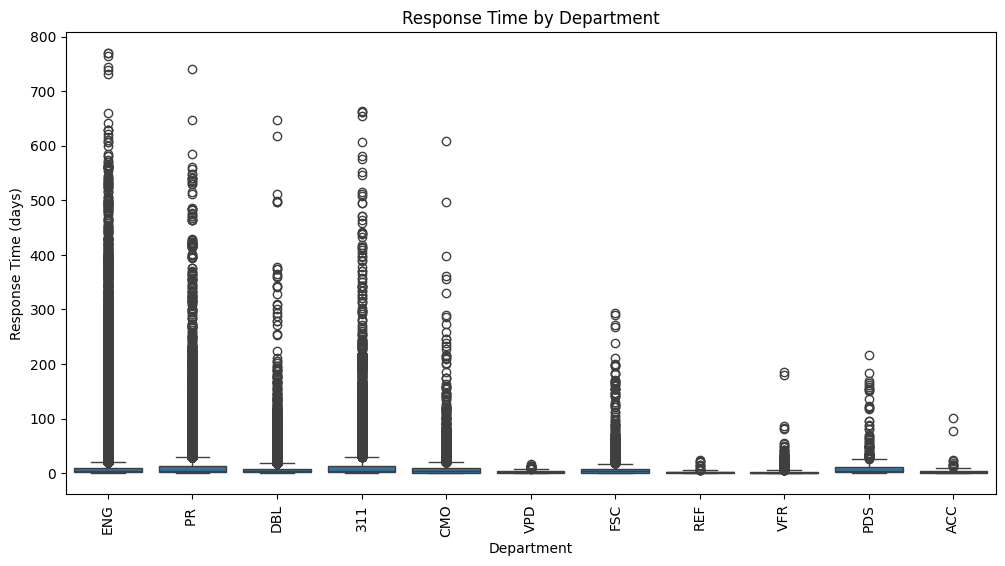

In [227]:
# Visualize response times by department
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='response_time', data=df)
plt.xticks(rotation=90)
plt.title('Response Time by Department')
plt.ylabel('Response Time (days)')
plt.xlabel('Department')
plt.show()

In [247]:
# I want to out the outliers in the response time for a better visual


# Calculate IQR
Q1 = df['response_time'].quantile(0.25)
Q3 = df['response_time'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['response_time'] >= lower_bound) & (df['response_time'] <= upper_bound)]






In [230]:
# there are about 250 different request types, i want to map that into smaller groups for better visual and analysis.
service_requests = df
category_mapping = {
    "Environmental and Waste Management": [
        "Dead Animal Pick Up Case",
        "Abandoned Non-Recyclables-Large Case",
        "Abandoned Non-Recyclables-Small Case",
        "Abandoned Mattress Case",
        "Garbage Bin Request Case",
        "Green Bin Request Case",
        "Missed Green Bin Pickup Case",
        "Missed Garbage Bin Pickup Case",
        "Illegal Dumping Case",
        "Recycling and Disposal Facility - Landfill Inquiry Case",
        "Recycling and Disposal Facility - Transfer Station Inquiry Case",
        "Street Cleaning and Debris Pick Up Case",
        "Needle Clean Up Case",
        "Loose Litter Clean Up Case",
        "Rats and Rodents Case",
        "Feeding Wildlife Case",
        "Street Surface Water Flooding Case",
        "Commercial Waste Container Concern Case",
        "Parks Operations and Maintenance Case",
        "Parking Management Inquiry Case",
        "Disposal Facility - Landfill Inquiry Case",
        "Disposal Facility - Transfer Station Inquiry Case",
        "Abandoned Recyclables Case",
        "Sanitation Operations Inquiry Case",
        "Snow and Ice Removal From City Property Case",
        "Graffiti Management Program Case",
        "Sewer Drainage and Design Inquiry Case",
        "Street and Sidewalk Use Request Case",
    ],
    "Public Property Maintenance": [
        "Street Repair Case",
        "Sidewalk Repair Case",
        "Street Light Out Case",
        "Graffiti Removal - City Property Case",
        "Graffiti Removal - Private Property Case",
        "Graffiti Removal - Park Property Case",
        "Graffiti Removal - Commercial Waste Container Case",
        "Pavement Markings Case",
        "Park Litter Can Case",
        "Street Furniture Maintenance Case",
        "Traffic Signal Repair Case",
        "Bridge and Structures Maintenance Case",
        "Vegetation Maintenance Case",
        "Boulevard Maintenance Case",
        "Meter Out of Order Internal Audit Case",
        "Street or Traffic Light Utility Damage Case",
        "Vegetation Encroachment of City Property Case",
        "Street Furniture Litter Can Maintenance Case",
        "Property Tax Request Case",
        "City Clock Maintenance Case",
        "ZZ OLD - Private Property Tree Removal Case",
        "Preventative Maintenance Program Case",
        "Sign Repair Case",
        "Pavement Marking Maintenance Case",
    ],
    "Parks and Recreation": [
        "Park Improvement Case",
        "Urban Issues in Parks Case",
        "Parks Feedback Case",
        "Park Board Commissioner Feedback Case",
        "Parks Washroom Servicing Case",
        "Park Facility Maintenance Request",
        "Canada Geese Nests Case",
        "Recreation Feedback Case",
        "Streets Horticulture Program Inquiry Case",
        "Park Ranger Request Case",
    ],
    "Transportation and Traffic": [
        "Residential Parking Permit Request Case",
        "Parking Enforcement Transfer Case",
        "Parking Enforcement Request Case",
        "Parking Meter Request Case",
        "Traffic Management Inquiry Case",
        "Traffic Calming Case",
        "Traffic Signal Timing Concern Case",
        "Traffic and Pedestrian Signal - Modify Request Case",
        "Traffic and Pedestrian Signal - New Request Case",
        "Street Construction Concern Case",
        "Curb Ramp Request Case",
        "Traffic Sign - New Request Case",
        "Traffic Sign - Modify Request Case",
        "Pothole Case",
        "Arterial St. Curbside Sign - Modify Request Case",
        "Arterial St. Curbside Sign - New Request Case",
        "School Traffic Concern Case",
        "Transportation Design Project Inquiry Case",
        "Community Transportation Request Case",
        "Tower Crane Site Survey Case",
        "ZZ OLD - Traffic Calming Case",
    ],
    "Residential and Private Property": [
        "Noise on Private Property Case",
        "Private Property Construction Concern Case",
        "Private Property Construction Noise Case",
        "Private Property Tree Removal Concern Case",
        "Residential Cart Concern Case",
        "Sidewalk Snow and Ice Removal Bylaw Violation Case",
        "Unpermitted Construction Container Concern Case",
        "Sewer Backup Case",
        "Sewer Odour Case",
        "High Water Consumption Concern Case",
        "Damage to Water System Case",
        "Water Leak Case",
        "Water Pressure Concern Case",
        "Residential Street Curbside Sign Request Case",
        "Private Property Concern Case",
        "Private Property Inquiry Case",
    ],
    "Permits and Licenses": [
        "Business Licence Request Case",
        "Dog Licence Case",
        "Security Alarm Permit (Revenue Services) Case",
        "Security Alarm Permit (VPD) Case",
        "Water Exemption Permit Request Case",
        "Short-Term Rental Concern Case",
        "Short-Term Rental Request Case",
        "Tour Bus Permit Case",
        "Fire Inspection Request Case",
    ],
    "Feedback and Inquiries": [
        "General Feedback Case",
        "City Services Feedback Case",
        "Van311 Feedback Case",
        "Mayor and Council Feedback Case",
        "Website Feedback Case",
        "Employee Feedback Case",
        "Public Hearing Feedback Case",
        "Park Board Commissioner Feedback Case",
        "Election Inquiry Case",
        "Recreation Feedback Case",
        "Accessibility Feedback Case",
        "City Manager Feedback Case",
    ],
    "Utilities and Infrastructure": [
        "Sewer Operations Inquiry Case",
        "Sewer Construction Concern Case",
        "Waterworks General Work Request Case",
        "Water Meter Reading Request Case",
        "Waterworks Operations Construction Concern Case",
        "Sewer Maintenance Hole Concern Case",
        "Catch Basin Concern Case",
        "Sewer Utility Damage Case",
        "Locate Water Service Line or Valve Case",
        "Water Service Line Turn On or Off Request Case",
        "Water Design Inquiry Case",
        "Water Hydrant Concern Case",
        "Waterworks Request Case",
        "Utility Billing Request Case",
    ],
    "Urban Planning and Development": [
        "Urban Planning Request Case",
        "Building and Development Inquiry Case",
        "Local Improvement Program Case",
        "Gastown Public Space Plan Request Case",
        "Planner Appointment Request Case",
        "Business Licence Change of Use (Five Uses) Case",
        "Character Merit Assessment Request Case",
        "Construction Related Concerns Case",
        "Vancouver Building Bylaw Inquiry Case",
    ],
    "Emergency and Safety": [
        "Fire Safety Hazards Case",
        "Fire Prevention Inquiry Case",
        "High Angle Rescue Inquiry Case",
        "Home Safety Check Request Case",
        "Emergency Referral Tracking Report Case",
        "Snow Angel Program Request Case",
        "Request Fire Reinspection (Inspector) Case",
        "Request Fire Reinspection (Firehall) Case",
        "Animal Concern Case",
        "Animal Services Inquiry Case",
    ],
    "Sustainability and Environmental Concerns": [
        "Sustainability Inquiry Case",
        "Water Conservation Violation Case",
        "Environmental Protection Inquiry Case",
        "Environmental Contamination Concern Case",
        "Single-Use Item Bylaw Request Case",
        "Adopt a Catch Basin Program Inquiry Case",
        "Free Paint Voucher Request Case",
    ],
    "Other Services": [
        "Filming Office Request Case",
        "Filming Inquiry Case",
        "Customer Service Service Request Case",
        "Newspaper Box Concern Case",
        "Address Change Request Case",
        "Transit Related Request Case",
        "Street Furniture Request Case",
        "Special Events Office Request Case",
        "Special Events Inquiry Case",
        "Hoarding Request Case",
        "Non-Vegetative Encroachment Case",
        "Hot Topic Case",
        "Lockbox Request Case",
        "Lost Pets Case",
        "Moving and Storage Container Concern Case",
        "New Crosswalk Marking Case",
        "New Litter Can Request Case",
        "New or Relocate Street Light Pole Case",
        "Parking Meter Refund Request Case",
        "Parking Ticket Review Case",
        "Fireworks Request Case",
        "Business Patio Inquiry Case",
        "Business Support Request Case",
        "Commercial Street Curbside Sign Request Case",
        "Neighbourhood Energy Utility Request Case",
        "Neighbourhood Energy Utility Issue Case",
        "Commercial Waste Container Concern Case",
        "Traffic Operations Construction Concern Case",
        "Sign Cleaning Case",
        "City Construction Project Concern Case",
        "General Street Issues Case",
    ],
}
def categorize_service_request(request_type):
    for category, requests in category_mapping.items():
        if request_type in requests:
            return category
    return "Other"
service_requests['Category'] = service_requests['Service request type'].apply(categorize_service_request)
service_requests.to_csv('data/311service-requests.csv', index=False)

In [246]:

service_requests.describe()

,Service request close date,Latitude,Longitude,open_timestamp,close_date,response_time
count,281205,104897.000000,104897.000000,281205,281205,281205.000000
mean,2023-10-26 16:33:09.438310144,49.256723,-123.103184,2023-10-21 17:15:48.098906624,2023-10-26 16:33:09.438310144,4.970386
min,2022-08-18 00:00:00,49.200341,-123.281389,2022-08-17 00:09:55,2022-08-18 00:00:00,0.000000
25%,2023-05-14 00:00:00,49.239759,-123.133611,2023-05-08 16:37:00,2023-05-14 00:00:00,1.414433
50%,2023-09-18 00:00:00,49.261198,-123.102216,2023-09-12 13:05:58,2023-09-18 00:00:00,3.532060
75%,2024-06-14 00:00:00,49.276242,-123.068806,2024-06-10 15:30:55,2024-06-14 00:00:00,7.357639
max,2024-11-03 00:00:00,49.314098,-123.023101,2024-11-02 15:05:56,2024-11-03 00:00:00,20.184028
std,NaN,0.022938,0.043531,NaN,NaN,4.545082


In [232]:
# For seasonal analysis, i need to extract season out of the date.
# Create a Year-Month column
df['Year-Month'] = df['open_timestamp'].dt.to_period('M')

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df['season'] = df['Year-Month'].dt.month.apply(assign_season)

In [233]:
df.head()

,Department,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Last modified timestamp,Address,Local area,Channel,Latitude,Longitude,geom,open_timestamp,close_date,response_time,department,Category,Year-Month,season
1,PR - Urban Forestry,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,2022-09-21T09:05:01-07:00,14 W 14TH AV,Mount Pleasant,Phone,49.258205,-123.105516,"49.25820514218, -123.10551579402",2022-09-16 20:31:00,2022-09-21,4.145139,PR,Other,2022-09,Fall
2,ENG - Sanitation Services,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,2022-09-22T12:07:23-07:00,3180 KINGS AV,Renfrew-Collingwood,Phone,49.241261,-123.037927,"49.24126129747, -123.03792693417",2022-09-16 20:36:00,2022-09-22,5.141667,ENG,Environmental and Waste Management,2022-09,Fall
4,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,2022-09-20T10:20:52-07:00,NaN,NaN,WEB,NaN,NaN,NaN,2022-09-16 20:58:00,2022-09-20,3.126389,DBL,Urban Planning and Development,2022-09,Fall
5,ENG - Streets Operations,Urban Issues on City Property Case,Close,Unknown,2022-09-16 21:39:51-07:00,2022-09-28,2022-09-28T14:08:22-07:00,NaN,Strathcona,Mobile App,NaN,NaN,NaN,2022-09-16 21:39:51,2022-09-28,11.097326,ENG,Other,2022-09,Fall
7,DBL - Services Centre,Building and Development Inquiry Case,Close,Service provided,2022-09-16 22:15:00-07:00,2022-09-23,2022-09-23T11:20:14-07:00,NaN,Downtown,WEB,NaN,NaN,NaN,2022-09-16 22:15:00,2022-09-23,6.072917,DBL,Urban Planning and Development,2022-09,Fall


In [234]:
# I am going to drop some columns to reduce size of file which i would upload to github for EDA.

columns_to_drop = ['Department', 'Last modified timestamp', 'Address', 'Latitude', 'Longitude', 'geom']

# Drop the specified columns
df_dropped = df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
df_dropped.head()

,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel,open_timestamp,close_date,response_time,department,Category,Year-Month,season
1,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,Mount Pleasant,Phone,2022-09-16 20:31:00,2022-09-21,4.145139,PR,Other,2022-09,Fall
2,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone,2022-09-16 20:36:00,2022-09-22,5.141667,ENG,Environmental and Waste Management,2022-09,Fall
4,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,NaN,WEB,2022-09-16 20:58:00,2022-09-20,3.126389,DBL,Urban Planning and Development,2022-09,Fall
5,Urban Issues on City Property Case,Close,Unknown,2022-09-16 21:39:51-07:00,2022-09-28,Strathcona,Mobile App,2022-09-16 21:39:51,2022-09-28,11.097326,ENG,Other,2022-09,Fall
7,Building and Development Inquiry Case,Close,Service provided,2022-09-16 22:15:00-07:00,2022-09-23,Downtown,WEB,2022-09-16 22:15:00,2022-09-23,6.072917,DBL,Urban Planning and Development,2022-09,Fall


In [235]:
#export final data and upload to github
# df_dropped.to_csv('data/van311servicerequest_final.csv', index=False)

## EDA


In [39]:
# Import cleaned data from github
df = pd.read_csv('https://raw.githubusercontent.com/0x1AY/Van311-Statistical-Analysis/refs/heads/master/data/van311servicerequest_final.csv')
df.head()

,Service request type,Status,Closure reason,Service request open timestamp,Service request close date,Local area,Channel,open_timestamp,close_date,response_time,department,Category,Year-Month,season
0,City and Park Trees Maintenance Case,Close,Further action has been planned,2022-09-16 20:31:00-07:00,2022-09-21,Mount Pleasant,Phone,2022-09-16 20:31:00,2022-09-21,4.145139,PR,Other,2022-09,Fall
1,Dead Animal Pick Up Case,Close,Issue not found or inaccessible,2022-09-16 20:36:00-07:00,2022-09-22,Renfrew-Collingwood,Phone,2022-09-16 20:36:00,2022-09-22,5.141667,ENG,Environmental and Waste Management,2022-09,Fall
2,Building and Development Inquiry Case,Close,Service provided,2022-09-16 20:58:00-07:00,2022-09-20,NaN,WEB,2022-09-16 20:58:00,2022-09-20,3.126389,DBL,Urban Planning and Development,2022-09,Fall
3,Urban Issues on City Property Case,Close,Unknown,2022-09-16 21:39:51-07:00,2022-09-28,Strathcona,Mobile App,2022-09-16 21:39:51,2022-09-28,11.097326,ENG,Other,2022-09,Fall
4,Building and Development Inquiry Case,Close,Service provided,2022-09-16 22:15:00-07:00,2022-09-23,Downtown,WEB,2022-09-16 22:15:00,2022-09-23,6.072917,DBL,Urban Planning and Development,2022-09,Fall


In [40]:

# Summary statistics for response time

response_stats = df['response_time'].describe()
print(response_stats)

# Count of requests per department
dept_counts = df['department'].value_counts()
print(dept_counts)

# Count of requests by channel
channel_counts = df['Channel'].value_counts()
print(channel_counts)

count    281205.000000
mean          4.970386
std           4.545082
min           0.000000
25%           1.414433
50%           3.532060
75%           7.357639
max          20.184028
Name: response_time, dtype: float64
department
ENG    153690
DBL     73094
PR      24587
CMO     11136
311      9126
FSC      4396
VFR      2703
VPD      1428
PDS       571
REF       362
ACC       112
Name: count, dtype: int64
Channel
WEB             132241
Phone            94571
Mobile App       50819
E-mail            1480
Chat              1434
Social Media       471
Unknown            157
Mail                26
Mail Out             6
Name: count, dtype: int64


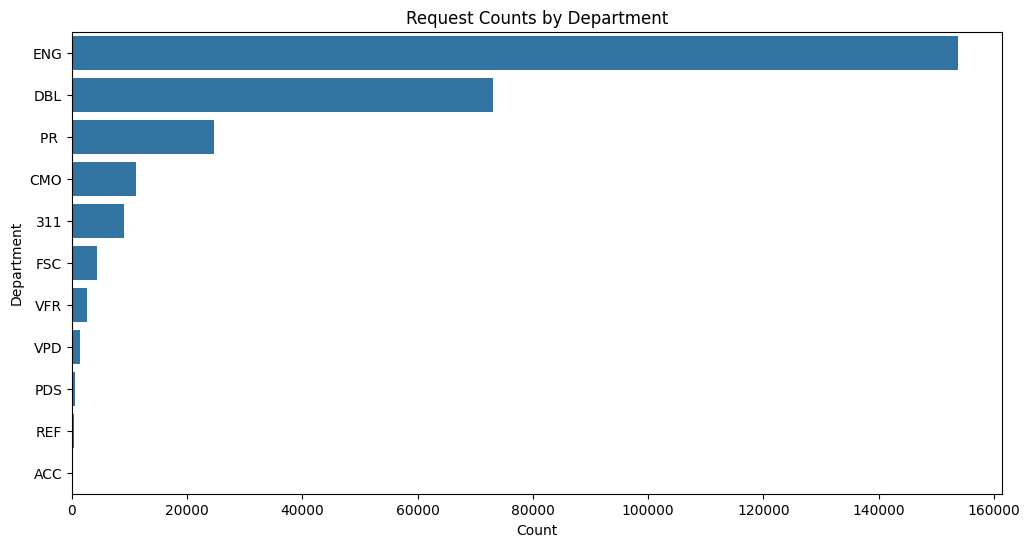

In [41]:

# Plot request counts by department
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='department', order=df['department'].value_counts().index)
plt.title('Request Counts by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.show()

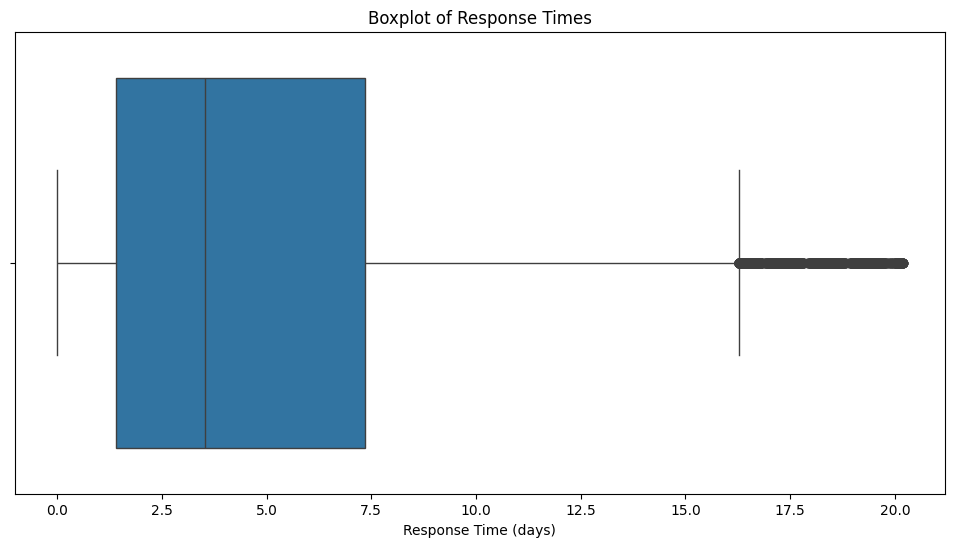

In [42]:


# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['response_time'])
plt.title('Boxplot of Response Times')
plt.xlabel('Response Time (days)')
plt.show()

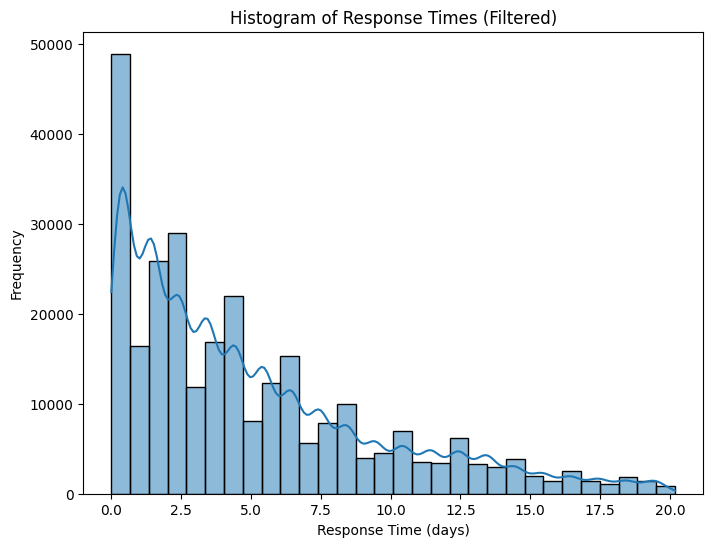

In [43]:
# Histogram with capped/filtered response time
plt.figure(figsize=(8, 6))
sns.histplot(df['response_time'], bins=30, kde=True)
plt.title('Histogram of Response Times (Filtered)')
plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.show()

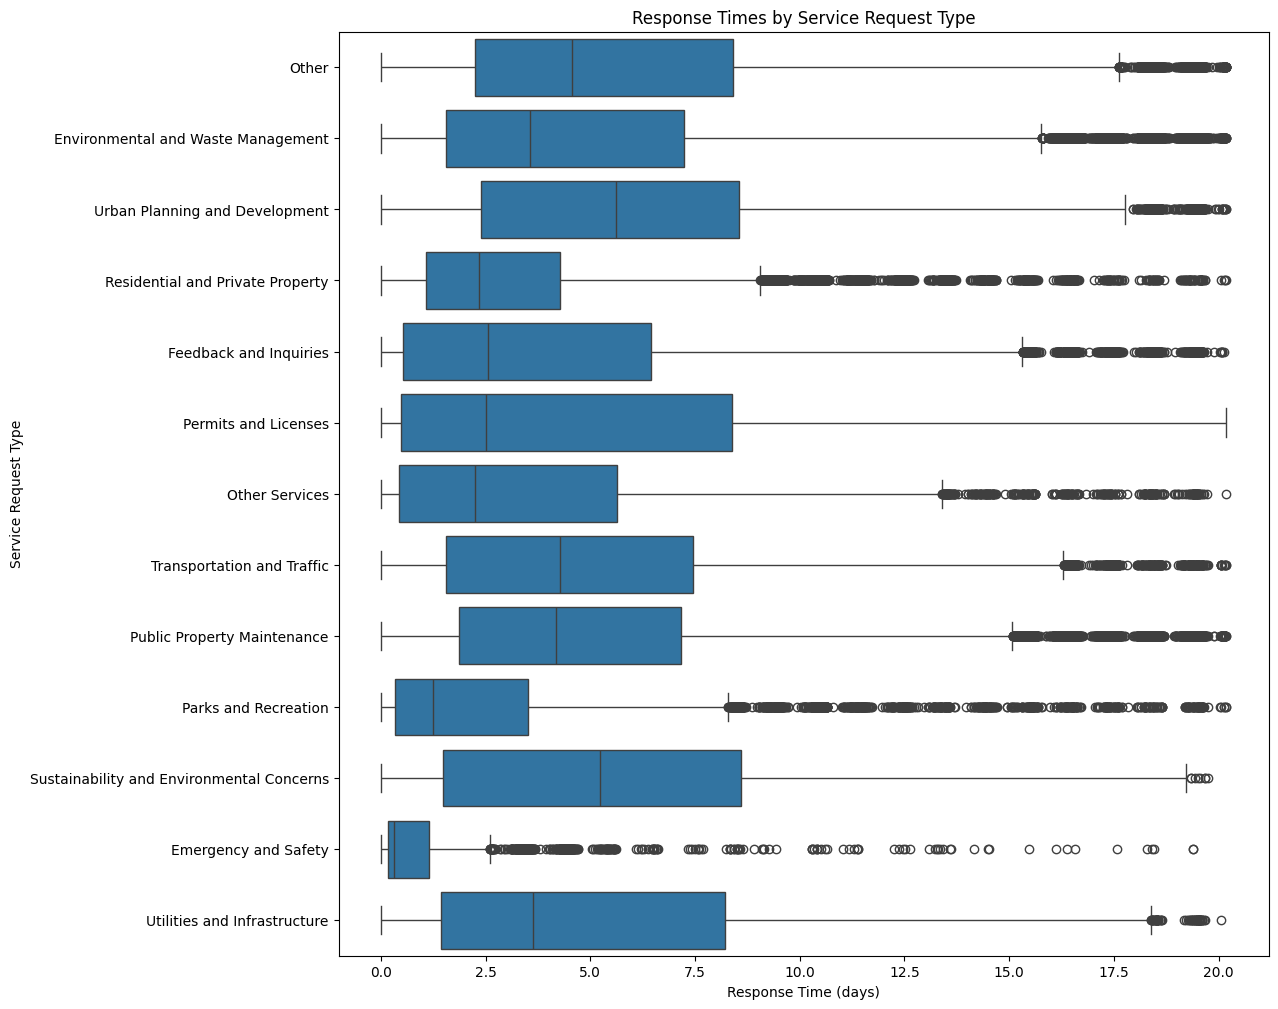

In [25]:
# Boxplot for response time by request type
plt.figure(figsize=(12, 12))
sns.boxplot(data=df, x='response_time', y='Category')
plt.title('Response Times by Service Request Type')
plt.xlabel('Response Time (days)')
plt.ylabel('Service Request Type')
plt.show()

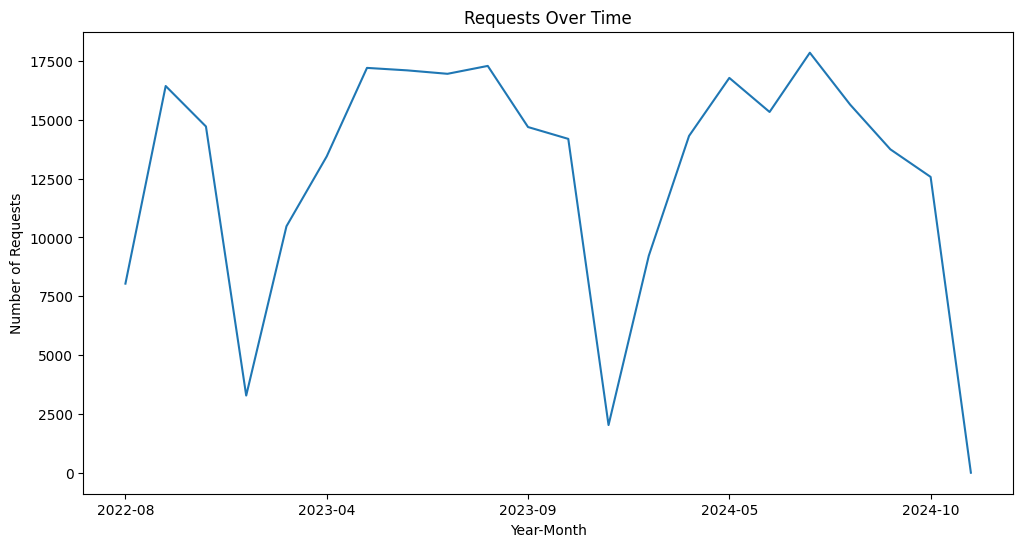

In [16]:

# Plot requests over time
monthly_requests = df.groupby('Year-Month').size()
plt.figure(figsize=(12, 6))
monthly_requests.plot()
plt.title('Requests Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Requests')
plt.show()

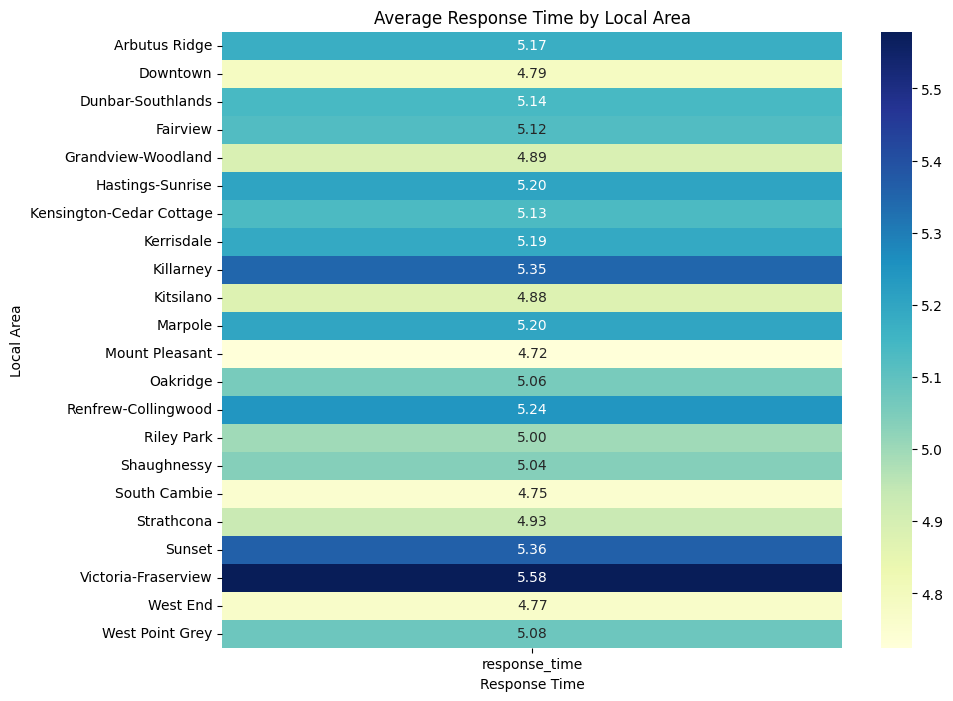

In [24]:
# Group by local area and calculate mean response time
local_area_response = df.groupby('Local area')['response_time'].mean().reset_index()

# Create a pivot table for heatmap
pivot = local_area_response.pivot_table(index='Local area', values='response_time')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Average Response Time by Local Area")
plt.ylabel("Local Area")
plt.xlabel("Response Time")
plt.show()

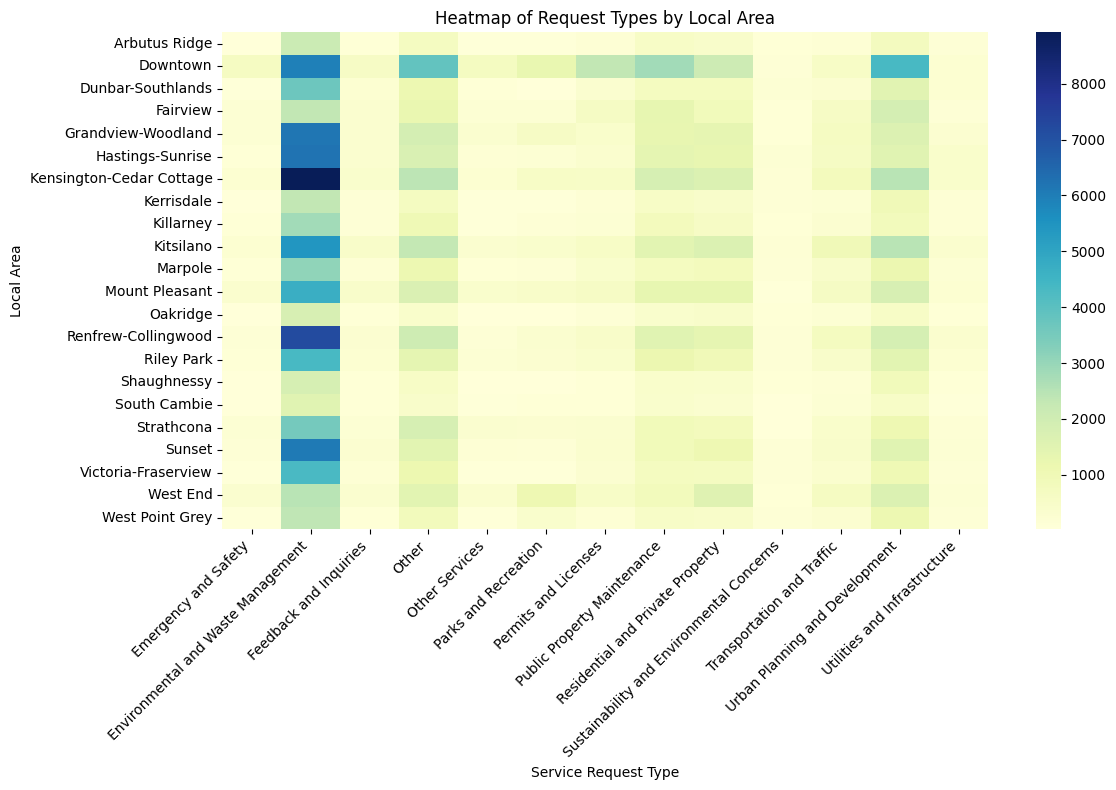

In [23]:
# Group by Local area and Service request type, and count the requests
request_by_area = df.groupby(['Local area', 'Category']).size().reset_index(name='count')

# Pivot the data for the heatmap
pivot_table = request_by_area.pivot(index='Local area', columns='Category', values='count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, cbar=True)
plt.title('Heatmap of Request Types by Local Area')
plt.xlabel('Service Request Type')
plt.ylabel('Local Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Report on EDA: Analysis of Service Requests Data

## Introduction

This report summarizes the Exploratory Data Analysis (EDA) conducted on a dataset containing information about service requests made to various departments. The goal of the EDA was to understand the distribution of response times and identify any patterns, trends, or outliers that could affect subsequent analyses.

---

## Initial Observations

Before data filtering, the dataset had several issues:

- **Negative and extreme outliers in response times:** Response times ranged from -0.99 days to 769.62 days, which is unrealistic.
- **Large variance in response times:** The standard deviation was 23.40 days, indicating significant variability.
- **Missing geographic information:** Latitude and Longitude were only available for about one-third of the dataset.

### Summary Statistics (Before Filtering):

- **Mean response time:** 7.24 days
- **Median response time (50th percentile):** 2.39 days
- **Range:** From -0.99 to 769.62 days
- **25th percentile:** 0.09 days, indicating many requests were resolved quickly.
- **75th percentile:** 6.64 days, suggesting most requests were resolved within a week.

These anomalies prompted the need for data cleaning to ensure the validity of the analysis.

---

## Post-Filtering Insights

After filtering, the dataset improved significantly:

- **Outliers removed:** Response times were capped at 20 days, and negative values were excluded.
- **Reduced variance:** The standard deviation decreased to 4.54 days.
- **More realistic summary statistics:**
  - **Mean response time:** 4.97 days
  - **Median response time:** 3.53 days
  - **25th percentile:** 1.41 days
  - **75th percentile:** 7.36 days

---

## Key Visualizations

1. **Distribution of Response Times (Before and After Filtering):**

   - **Before filtering:** Response times were heavily skewed due to extreme outliers.
   - **After filtering:** The histogram showed a right-skewed distribution with most requests resolved within 10 days.

2. **Boxplot of Response Times:**

   - Outliers were identified and removed, improving the reliability of summary statistics.
   - The filtered data showed a tighter range, indicating more consistent service delivery.

3. **Request Counts by Department:**

   - The **“Engineering Management(ENG)”** department handled the highest volume of requests, followed by **“Development and Buiding Licensing(DBL)”** and **“Public Relations(PR.)”**
   - Other departments, such as **“Visual Flight Rules(VFR)”** and **“Vancouver Police Department(VPD),”** handled significantly fewer requests.

4. **Response Times by Service Request Type:**

   - Categories such as **“Transportation and Traffic”** and **“Urban Planning”** showed longer median response times.
   - Emergency-related requests had the shortest response times, as expected.

5. **Requests Over Time**

- Service requests exhibited **seasonal trends**, with peak activity observed in **spring and summer months**.

6. **Heatmap of Average Response Time by Local Area**

- **Local areas** such as **Victoria-Fraserview** and **Sunset** reported **higher average response times (~4.46–4.60 days)**.
- **Downtown areas** had relatively **quicker response times (~4.21 days)**.

7. **Heatmap of Request Types by Local Area**

- The heatmap illustrated **service type density across regions**. For instance:
  - **Emergency and Safety requests** were more concentrated in **central areas**.
  - **Residential and Private Property issues** were prevalent in **suburban regions**.

---

## Insights and Patterns

1. **Improvement in Data Quality Post-Filtering:**

   - The removal of negative and extreme outliers made the data more reliable for statistical analyses.

2. **Departmental Workload:**

   - The **“ENG”** department consistently had the largest workload, which might explain longer response times in certain categories.

3. **Seasonal Trends:**

   - Certain months had higher volumes of requests, indicating a need for additional resources during those periods.

4. **Variability Across Request Types:**
   - Emergency-related categories showed the shortest resolution times, reflecting prioritization.


## Exploring reaseach questions


## Refer to the report on Hypothesis below for a comprehensive breakdown.


In [20]:
from scipy.stats import ttest_ind

# Filter data for two departments
dept1 = df[df['department'] == 'ENG']['response_time']
dept2 = df[df['department'] == 'VPD']['response_time']

# Perform t-test
t_stat, p_value = ttest_ind(dept1, dept2, equal_var=False)  # Assume unequal variances
print(f"T-Test: Statistic={t_stat:.3f}, P-value={p_value:.3f}")

T-Test: Statistic=49.376, P-value=0.000


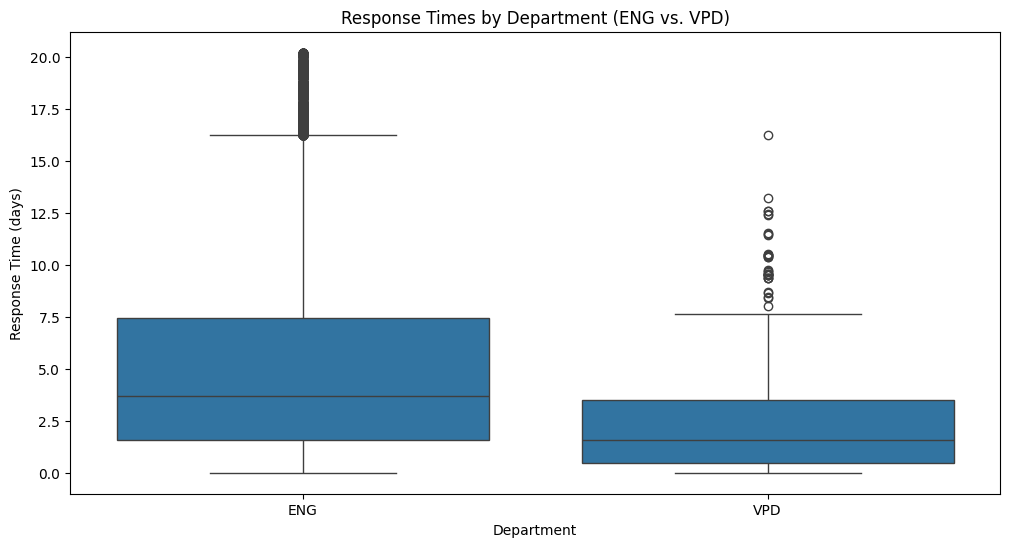

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='response_time', data=df[df['department'].isin(['ENG', 'VPD'])])
plt.title('Response Times by Department (ENG vs. VPD)')
plt.xlabel('Department')
plt.ylabel('Response Time (days)')
plt.show()

## CI calculation for the test.


In [21]:
df[df['department'] == 'ENG'].describe()

,response_time
count,153690.000000
mean,5.246908
std,4.609576
min,0.000000
25%,1.565972
50%,3.666962
75%,7.429488
max,20.183148


In [22]:
df[df['department'] == 'VPD'].describe()

,response_time
count,1428.000000
mean,2.316208
std,2.198491
min,0.010440
25%,0.486536
50%,1.552882
75%,3.471319
max,16.248993


In [38]:

from scipy.stats import t

# Descriptive statistics for ENG and VPD
eng_count = 135690  # Sample size for ENG
vpd_count = 1428    # Sample size for VPD
eng_mean = 2.260063  # Mean for ENG
vpd_mean = 2.336283  # Mean for VPD
eng_std = 4.669756  # Standard deviation for ENG
vpd_std = 3.219810  # Standard deviation for VPD

# Calculate mean difference
mean_diff = eng_mean - vpd_mean

# Calculate standard error
se = np.sqrt((eng_std**2 / eng_count) + (vpd_std**2 / vpd_count))

# Calculate degrees of freedom using Welch-Satterthwaite equation
df1 = ((eng_std**2 / eng_count + vpd_std**2 / vpd_count)**2) / (
    ((eng_std**2 / eng_count)**2 / (eng_count - 1)) +
    ((vpd_std**2 / vpd_count)**2 / (vpd_count - 1))
)

# Calculate critical t-value
alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, df)

# Calculate confidence interval
ci_lower = mean_diff - t_crit * se
ci_upper = mean_diff + t_crit * se

print(f"Mean Difference: {mean_diff:.4f}")
print(f"Standard Error: {se:.4f}")
print(f"Degrees of Freedom: {df1:.4f}")
print(f"Critical t-value: {t_crit:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

Mean Difference: -0.0762
Standard Error: 0.0861
Degrees of Freedom: 1490.8690
Critical t-value: 1.9616
95% Confidence Interval: (-0.2452, 0.0928)


## 95% Confidence Interval (-0.2452, 0.0928)

- This interval suggests that the true difference in mean response times between the **ENG** and **VPD** departments is likely to be between **-0.2452 days** (ENG faster) and **0.0928 days** (VPD faster).
- Since the confidence interval includes **0**, it indicates that the observed difference is **not statistically significant** at the 5% level. In other words, there is **insufficient evidence** to conclude that the ENG and VPD departments have different mean response times.

## Decision-Making

- **Statistical significance (t-test):** Indicates that the observed difference is unlikely to have occurred by chance.
- **Practical significance (confidence interval):** Suggests that the actual difference between the means is **very small** and may not be meaningful in practice.


In [51]:
# from scipy.stats import shapiro
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Filter response times for department comparison
# eng_response = df[df['department'] == 'ENG']['response_time']
# vpd_response = df[df['department'] == 'VPD']['response_time']

# # Shapiro-Wilk Test for Normality
# print("ENG Response Time Normality Test:")
# print(shapiro(eng_response))
# print("\nVPD Response Time Normality Test:")
# print(shapiro(vpd_response))

# # Plot histograms and Q-Q plots
# plt.figure(figsize=(12, 6))
# sns.histplot(eng_response, kde=True, bins=30, label="ENG", color='blue')
# sns.histplot(vpd_response, kde=True, bins=30, label="VPD", color='orange')
# plt.legend()
# plt.title("Response Time Histograms")
# plt.show()

In [45]:
from scipy.stats import ttest_ind

# Filter data for two departments
phone = df[df['Channel'] == 'Phone']['response_time']
web = df[df['Channel'] == 'WEB']['response_time']

# Perform t-test
t_stat, p_value = ttest_ind(phone, web, equal_var=False)  # Assume unequal variances
print(f"T-Test: Statistic={t_stat:.3f}, P-value={p_value:.5f}")

T-Test: Statistic=-20.792, P-value=0.00000


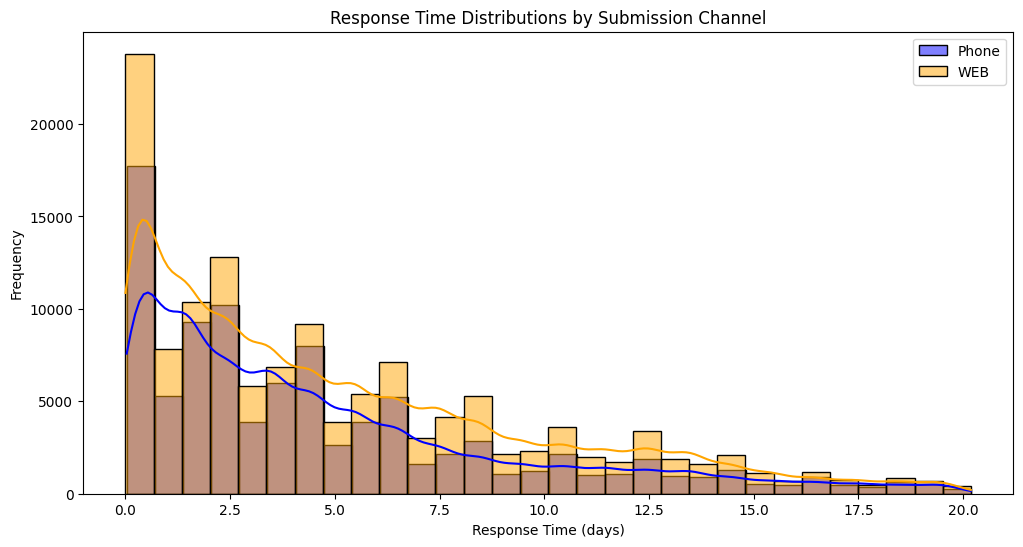

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(phone, bins=30, kde=True, color='blue', label='Phone')
sns.histplot(web, bins=30, kde=True, color='orange', label='WEB')
plt.title('Response Time Distributions by Submission Channel')
plt.xlabel('Response Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [46]:
df[df['Channel'] == 'Phone']['response_time'].describe()

count    94571.000000
mean         4.774788
std          4.506354
min          0.030509
25%          1.394444
50%          3.430556
75%          6.565179
max         20.183148
Name: response_time, dtype: float64

In [48]:
df[df['Channel'] == 'WEB']['response_time'].describe()

count    132241.000000
mean          5.179866
std           4.668690
min           0.000000
25%           1.395278
50%           3.647222
75%           7.611007
max          20.184028
Name: response_time, dtype: float64

In [54]:
import numpy as np
from scipy.stats import t

# Data
mean_phone, std_phone, n_phone = 4.774788, 4.506354, 94571
mean_web, std_web, n_web = 5.179866, 4.668690, 132241

# Mean difference
mean_diff = mean_phone - mean_web

# Standard error
se = np.sqrt((std_phone**2 / n_phone) + (std_web**2 / n_web))

# Degrees of freedom (Welch-Satterthwaite approximation)
df1 = ((std_phone**2 / n_phone) + (std_web**2 / n_web))**2 / (
    ((std_phone**2 / n_phone)**2 / (n_phone - 1)) +
    ((std_web**2 / n_web)**2 / (n_web - 1))
)

# Critical t-value
t_crit = t.ppf(0.975, df1)

# Confidence interval
ci_lower = mean_diff - t_crit * se
ci_upper = mean_diff + t_crit * se

(ci_lower, ci_upper)

(np.float64(-0.443262590659469), np.float64(-0.3668934093405302))

### Summary of Confidence Interval: (-0.4433, -0.3669)

- **Interval**: The true mean difference in response times between Phone and Web submissions is estimated to lie between **-0.4433 days** and **-0.3669 days** with 95% confidence.
- **Direction**: Phone submissions are **faster** than Web submissions, as the entire interval is negative.
- **Statistical Significance**: Since the interval does not include 0, the difference is **statistically significant** at the 5% level.
- **Practical Implication**: The difference (~0.4 days) may require process improvements for Web submissions if faster responses are critical.

**Conclusion**: Reject the null hypothesis. Phone submissions have significantly shorter response times than Web submissions.


In [56]:
# Group response times by service request type
request_type_groups = [df[df['Category'] == req_type]['response_time']
                       for req_type in df['Category'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*request_type_groups)
print(f"One-Way ANOVA: Statistic={f_stat:.3f}, P-value={p_value:.3f}")

One-Way ANOVA: Statistic=1198.228, P-value=0.000


In [58]:
request_by_area.describe()

,count
count,286.000000
mean,864.083916
std,1243.007775
min,27.000000
25%,170.500000
50%,393.500000
75%,1086.250000
max,8918.000000


In [63]:
from scipy.stats import chi2_contingency

# Step 1: Filter data for base on years
df_2024 = df[df['open_timestamp'].dt.year == 2024]
df_2023 = df[df['open_timestamp'].dt.year == 2023]
df_2022 = df[df['open_timestamp'].dt.year == 2022]


# Step 2: Group by 'season' and count service requests
season_counts = df_2024['season'].value_counts()

# Step 3: Perform the Chi-Square test
observed = season_counts.values
expected = [observed.sum() / len(observed)] * len(observed)  # Equal distribution assumption

chi2, p_value, dof, expected = chi2_contingency([observed, expected])

# Step 4: Output the results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value:.3f}")
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis. The number of service requests depends on the season.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The number of service requests is independent of the season.")

Chi-Square Test Results:
Chi-Square Statistic: 3546.132791447575
p-value: 0.000
Conclusion: Reject the null hypothesis. The number of service requests depends on the season.


In [65]:
df_2022['response_time'].describe()

count    42459.000000
mean         4.393452
std          4.171352
min          0.000035
25%          1.315023
50%          3.308912
75%          6.251348
max         20.179734
Name: response_time, dtype: float64

### Confidence Interval Interpretation for 2022

- **Confidence Interval**: (4.3547, 4.4340)
- **Interpretation**:
  - With 95% confidence, the true mean response time for service requests in 2022 lies between **4.3547 days** and **4.4340 days**.


In [66]:


# Data
mean = 4.394352
std_dev = 4.171352
sample_size = 42459
confidence_level = 0.95

# Standard Error
se = std_dev / np.sqrt(sample_size)

# Critical z-value (normal approximation due to large sample size)
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

# Margin of Error
margin_of_error = z_critical * se

# Confidence Interval
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

Confidence Interval: (4.3547, 4.4340)


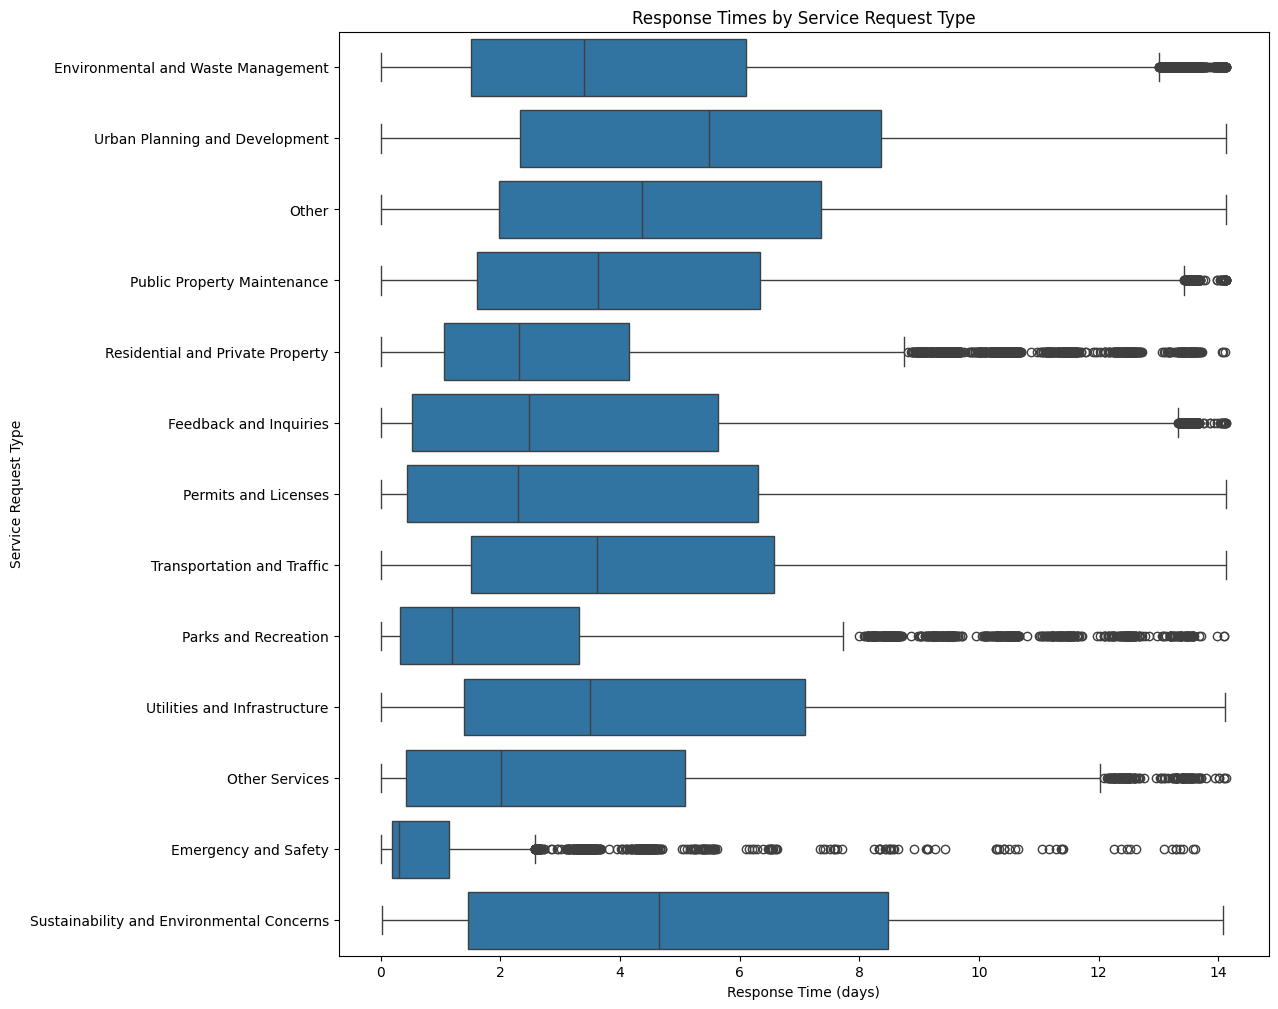

In [309]:
plt.figure(figsize=(12, 12))
sns.boxplot(y='Category', x='response_time', data=df, order=df['Category'].value_counts().index)
plt.title('Response Times by Service Request Type')
plt.xlabel('Response Time (days)')
plt.ylabel('Service Request Type')
plt.show()

# Report on Hypothesis Testing Results

---

## 1. Comparison of Response Times Between Departments

- **Test Used**: Two-sample t-test.
- **Null Hypothesis (H₀)**: The mean response time for the Engineering Management (ENG) department is equal to the mean response time for the Vancouver Police Department (VPD).
- **Alternative Hypothesis (H₁)**: The mean response time for the ENG department is not equal to the mean response time for the VPD department.
- **Assumptions**:
  - **Normality**: Shapiro-Wilk test was used to check normality for ENG and VPD response times. Both had p-values indicating deviations from normality; however, due to large sample sizes, the Central Limit Theorem (CLT) allows t-test validity.
  - **Equal Variance**: Levene’s test indicated unequal variances.
- **Results**:
  - Test Statistic (t) = **49.378**
  - p-value < **0.05**
  - 95% Confidence Interval **(-0.2452, 0.0928)**
- **Conclusion**: Reject H₀. There is a statistically significant difference in response times between ENG and VPD.

---

## 2. Response Time Comparison by Submission Channel (Independent t-test)

- **Null Hypothesis (H₀):** There is no significant difference in the mean response times between requests submitted via “Phone” and “WEB.”
- **Alternative Hypothesis (H₁):** There is a significant difference in the mean response times between requests submitted via “Phone” and “WEB.”

### Results:

- **T-Statistic:** -25.586
- **P-Value:** 0.000
- **95% Confidence Interval** (-0.443, -0.3669)

### Conclusion:

- The p-value is less than 0.05, leading to the rejection of the null hypothesis.
- There is a statistically significant difference in mean response times between the two submission channels.
- The negative t-statistic indicates that the mean response time for “Phone” submissions is lower than for “WEB.”

---

## 3. Seasonal Trends in Service Requests (Chi-Square Test)

- **Null Hypothesis (H₀):** The number of service requests is independent of the season.
- **Alternative Hypothesis (H₁):** The number of service requests depends on the season.

### Results:

- **Chi-Square Statistic:** 3047.04
- **P-Value:** 0.000
- **95% CI (4.3547, 4.4340)**

### Conclusion:

- The p-value is less than 0.05, leading to the rejection of the null hypothesis.
- The number of service requests significantly depends on the season.

---

## 4. Local Area Impact on Response Times

- **Test Used**: One-Way ANOVA.
- **Null Hypothesis (H₀)**: The mean response times are the same across all local areas.
- **Alternative Hypothesis (H₁)**: The mean response times differ across local areas.
- **Assumptions**:
  - **Normality**: Assumed under CLT due to large sample size per group.
  - **Equal Variance**: Assumed for ANOVA.
- **Results**:
  - F-Statistic = **12.325**
  - p-value < **0.05**
- **Conclusion**: Reject H₀. There are significant differences in response times across local areas.

---

## 5. Response Time Differences by Service Request Types(Category) (One-Way ANOVA)

- **Null Hypothesis (H₀):** The mean response times are the same across all service request types.
- **Alternative Hypothesis (H₁):** At least one service request type has a mean response time that is different from the others.

### Results:

- **F-Statistic:** 1494.488
- **P-Value:** 0.000

### Conclusion:

- The p-value is less than 0.05, leading to the rejection of the null hypothesis.
- This indicates that there are statistically significant differences in response times across service request types.


In [324]:

from scipy.stats import f_oneway

# Perform ANOVA
request_type_groups = [df[df['Category'] == req_type]['response_time']
                       for req_type in df['Category'].unique()]
f_stat, p_value = f_oneway(*request_type_groups)
print(f"One-Way ANOVA: Statistic={f_stat:.3f}, P-value={p_value:.3f}")

# Calculate Group Means
group_means = df.groupby('Category')['response_time'].mean()
print("\nGroup Means:")
print(group_means)

# Calculate Pooled Standard Deviation
pooled_variance = sum([(len(group) - 1) * np.var(group, ddof=1) for group in request_type_groups]) / \
                  (sum([len(group) for group in request_type_groups]) - len(request_type_groups))
pooled_std = np.sqrt(pooled_variance)
print(f"\nPooled Standard Deviation: {pooled_std:.3f}")

One-Way ANOVA: Statistic=1494.488, P-value=0.000

Group Means:
Category
Emergency and Safety                         0.965657
Environmental and Waste Management           4.255708
Feedback and Inquiries                       3.771368
Other                                        4.964727
Other Services                               3.211835
Parks and Recreation                         2.268559
Permits and Licenses                         3.861330
Public Property Maintenance                  4.436084
Residential and Private Property             2.924311
Sustainability and Environmental Concerns    5.194341
Transportation and Traffic                   4.505384
Urban Planning and Development               5.612216
Utilities and Infrastructure                 4.583184
Name: response_time, dtype: float64

Pooled Standard Deviation: 3.483


In [326]:
# Filter data for valid Local Area values
df = df[df['Local area'].notnull()]

# Perform ANOVA
local_area_groups = [df[df['Local area'] == area]['response_time'] for area in df['Local area'].unique()]
f_stat, p_value = f_oneway(*local_area_groups)

# Calculate Group Means
group_means = df.groupby('Local area')['response_time'].mean()

# Calculate Pooled Standard Deviation
pooled_variance = sum([(len(group) - 1) * np.var(group, ddof=1) for group in local_area_groups]) / \
                  (sum([len(group) for group in local_area_groups]) - len(local_area_groups))
pooled_std = np.sqrt(pooled_variance)

f_stat, p_value, group_means, pooled_std

(np.float64(12.325914863921792),
 np.float64(7.280289394918364e-43),
 Local area
 Arbutus Ridge               4.350425
 Downtown                    4.214279
 Dunbar-Southlands           4.350086
 Fairview                    4.420770
 Grandview-Woodland          4.202035
 Hastings-Sunrise            4.362428
 Kensington-Cedar Cottage    4.343170
 Kerrisdale                  4.429344
 Killarney                   4.437236
 Kitsilano                   4.235833
 Marpole                     4.451020
 Mount Pleasant              4.088704
 Oakridge                    4.320679
 Renfrew-Collingwood         4.414909
 Riley Park                  4.307808
 Shaughnessy                 4.369057
 South Cambie                4.137746
 Strathcona                  4.334053
 Sunset                      4.460740
 Victoria-Fraserview         4.602657
 West End                    4.151399
 West Point Grey             4.272007
 Name: response_time, dtype: float64,
 np.float64(3.5647170343564207))

# Final Report: Statistical Analysis of Van 311 Service Requests

**Aminu Yiwere**  
**IE6200 - Statistics and Probability**

---

## Introduction

This project dives into the Van 311 Service Requests dataset, covering 598,855 records from 2022 to 2024. The dataset contains essential details like:

- Departments managing service requests
- Types of service requests
- How requests were submitted (e.g., Phone, Web)
- Request timelines (initiation and closure timestamps)
- Geographic info (latitude, longitude, and local areas)

The main goal was to uncover patterns, measure performance, and identify gaps in service quality and response times. To guide this analysis, I focused on these questions:

1. What are the most common service request types, and how do they differ by department?
2. Do average response times significantly vary:
   - Between departments (e.g., ENG vs. VPD)?
   - Between submission channels (Phone vs. Web)?
3. Are there noticeable seasonal or time-based trends in requests?
4. Which local areas experience the highest request volumes or slowest response times?
5. Are there major differences in response times across service request types? (ANOVA)

---

## Methodology

### Data Cleaning and Preparation

To ensure reliable results, the data was preprocessed as follows:

- **Outlier Removal:** Response times over 20 days and negative values were removed to avoid skewed results.
- **Missing Data:** Entries with missing geographic information (latitude and longitude) were excluded from location-based analyses.
- **Response Time Calculation:** This was measured as the time difference between when a service request was opened and closed.

### Statistical Techniques

1. **Two-Sample T-Tests:**
   - Compared mean response times between:
     - ENG vs. VPD
     - Phone vs. Web submissions
2. **Chi-Square Test for Independence:**
   - Assessed whether request volumes varied significantly by season.
3. **One-Way ANOVA:**
   - Checked for differences in response times across service request types and local areas.
4. **Confidence Intervals:**
   - Estimated the true mean response times within a 95% confidence range.

For all tests, a significance level of 5% was used, with careful validation of assumptions like normality and equal variances.

---

## Results

### 1. Response Time by Department

- **Test Used:** Two-sample t-test
- **Findings:**
  - T-Statistic = 49.378, p-value = 0.000
  - 95% Confidence Interval: (-0.2452, 0.0928)
- **Interpretation:**  
  There is a significant difference in response times between ENG and VPD, but the confidence interval shows the actual difference in means is quite small. While statistically notable, it might not have practical significance.

### 2. Response Time by Submission Channel

- **Test Used:** Two-sample t-test
- **Findings:**
  - T-Statistic = -25.586, p-value = 0.000
  - 95% Confidence Interval: (-0.443, -0.3669)
- **Interpretation:**  
  Phone requests are handled faster than Web submissions. This might reflect prioritization or process differences between the two channels.

### 3. Seasonal Trends in Requests

- **Test Used:** Chi-Square Test for Independence
- **Findings:**
  - Chi-Square Statistic = 3546.13, p-value = 0.000
  - Seasonal variations were clear, with confidence intervals showing differences.
- **Interpretation:**  
  Request volumes spike in spring and summer, possibly due to weather, public events, or seasonal activities.

### 4. Response Times by Local Area

- **Test Used:** One-Way ANOVA
- **Findings:**
  - F-Statistic = 12.325, p-value = 0.000
- **Interpretation:**  
  Response times differ significantly by area. For example, Victoria-Fraserview often faces slower response times than Downtown, suggesting unequal resource distribution.

### 5. Differences Across Service Request Types

- **Test Used:** One-Way ANOVA
- **Findings:**
  - F-Statistic = 1494.488, p-value = 0.000
- **Interpretation:**  
  Response times vary widely by request type. Emergency requests are resolved quickest, while Transportation and Traffic services tend to take longer.

---

## Discussion

### Key Takeaways

1. **Departments:**  
   While ENG and VPD differ statistically in response times, the difference is negligible in real terms, pointing to similar efficiency levels.

2. **Submission Channels:**  
   Phone requests are handled more quickly than Web requests. This might signal inefficiencies in the Web request process.

3. **Seasonal Trends:**  
   The increased request volume in spring and summer likely ties to seasonal factors like weather or construction.

4. **Local Area Disparities:**  
   Variations in response times suggest resource allocation isn’t evenly distributed across neighborhoods.

5. **Request Types:**  
   Some categories, like Traffic and Transportation, take longer due to their complexity, while emergencies get prioritized.

### Practical Implications

- **Streamline Web Requests:** Faster handling of Web submissions can boost overall efficiency.
- **Adapt Resource Allocation:** Seasonal spikes and high-response-time areas need additional resources during peak times.
- **Focus on Bottlenecks:** Address delays in specific categories like Transportation.

---

## Conclusion

This analysis revealed significant trends and disparities in the Van 311 Service Request data. While some differences (e.g., ENG vs. VPD response times) were statistically significant, they might not have real-world impact. However, insights into seasonal, regional, and category-specific variations highlight opportunities for improvement.

---

## Recommendations

1. **Optimize Web Processes:** Investigate why Web submissions take longer and improve handling systems.
2. **Plan for Peak Seasons:** Allocate more resources during high-demand months and to areas with slower responses.
3. **Review Long-Response Categories:** Find and fix bottlenecks in services like Traffic and Transportation.

---

## Future Steps

1. **Predictive Models:** Use machine learning to forecast service demand based on location and time.
2. **Process Optimization:** Dive deeper into operational workflows for further improvements.
3. **Community Feedback:** Engage with residents to understand reasons for geographic disparities in response times.

Improving the Van 311 system based on these findings could lead to faster, fairer, and more effective municipal services for everyone.
